<a href="https://colab.research.google.com/github/PolygonumAviculare/NN_Cats-Dogs/blob/master/CNN_dogs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%bash
rm -rf /content/*

In [0]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [0]:
%%bash
pwd
wget --output-document=cats_and_dogs.zip --quiet https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip
ls

/content
cats_and_dogs.zip


In [0]:
%%bash 

unzip -n cats_and_dogs.zip
rm -rf sampleSubmission.csv

unzip -q -o train.zip -d /content/kaggle_original_data
rm -rf train.zip
cp /content/kaggle_original_data/train/* /content/kaggle_original_data
rm -rf /content/kaggle_original_data/train

unzip -q -n /content/test1.zip
ls

Archive:  cats_and_dogs.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               
cats_and_dogs.zip
kaggle_original_data
test1
test1.zip


In [0]:
def make_acc_plot(history):
  acc,val_acc = history.history['acc'], history.history['val_acc']
  epochs= range(1, len(acc) + 1)
  
  plt.figure(figsize=(10,8))
  plt.plot(epochs, acc, label='Accuracyty of training', marker = 'o')
  plt.plot(epochs, val_acc, label='Accuracyty of validation', marker ='o')
  plt.legend()
  plt.title('Accuracyty of training and validation')
  plt.xlabel('Epoks')
  plt.ylabel('Accuracyty')
  plt.show()
  
def make_loss_plt(history):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  epochs = range(1, len(loss)+1)
  plt.figure(figsize=(10,8))
  plt.plot(epochs, loss, label='Loss of training', marker = 'o')
  plt.plot(epochs, val_loss, label='Loss of validation', marker ='o')
  plt.legend()
  plt.title('Loss of training and validation')
  plt.xlabel('Epoks')
  plt.ylabel('Loss')
  plt.show()
    
def display_aug_images(directory, index):
  fnames = [os.path.join(directory,fname) for fname in os.listdir(directory)]
  img_path = fnames[index]
  img = image.load_img(img_path, target_size =(150,150))
  x = image.img_to_array(img)
  x = x.reshape((1, ) + x.shape)
  i=1
  plt.figure(figsize=(20,14))
  for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3,4,i)
    plt.grid(False)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 13 ==0:
      break
    
  

In [0]:
original_dataset_dir = '/content/kaggle_original_data'

base_dir = '/content/cats_and_dogs'
if not os.path.exists(base_dir):
  os.mkdir(base_dir)
  
train_dir = os.path.join(base_dir, 'train') #zbior treningowe
valid_dir = os.path.join(base_dir, 'valid') #zbior walidacyjny
test_dir = os.path.join(base_dir, 'test') # zbior testowy

for directory in (train_dir, valid_dir, test_dir):
  if not os.path.exists(directory):
    os.mkdir(directory)
    
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_cats_dir, train_dogs_dir, valid_cats_dir, valid_dogs_dir, test_cats_dir, test_dogs_dir]

for directory in dirs:
  if not os.path.exists(directory):
    os.mkdir(directory)
  

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(valid_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(valid_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
##Test if its k

print('Cats # train', len(os.listdir(train_cats_dir)))
print('Cats # valid', len(os.listdir(valid_cats_dir)))
print('Cats # test', len(os.listdir(test_cats_dir)))

print('Dogs # train', len(os.listdir(train_dogs_dir)))
print('Dogs # valid', len(os.listdir(valid_dogs_dir)))
print('Dogs # test', len(os.listdir(test_dogs_dir))
)

Cats # train 1000
Cats # valid 500
Cats # test 500
Dogs # train 1000
Dogs # valid 500
Dogs # test 500


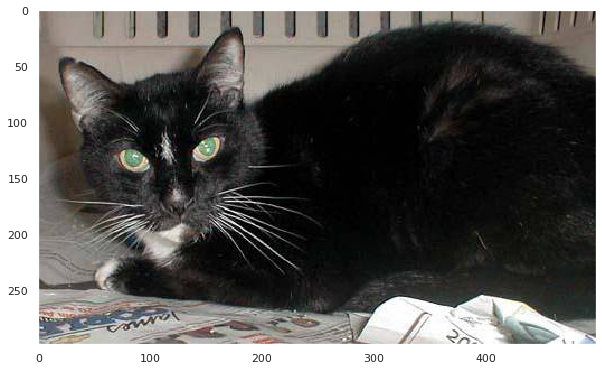

In [27]:
from keras.preprocessing import image

index = 209 #@param {type:'slider', min:0, max:999}
img_path = '/content/cats_and_dogs/train/cats/cat.' + str(index) +'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)


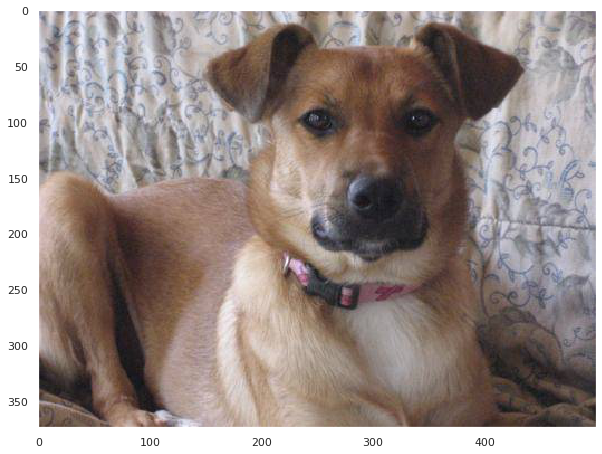

In [0]:
from keras.preprocessing import image

index = 431 #@param {type:'slider', min:0, max:999}
img_path = '/content/cats_and_dogs/train/dogs/dog.' + str(index) +'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)


In [28]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
  print('Shape of Input: ',data_batch.shape)
  print('Shapeof Input Labels: ', labels_batch.shape)
  break

Shape of Input:  (20, 150, 150, 3)
Shapeof Input Labels:  (20,)


In [32]:
import time

tic = time.time()
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=valid_generator,
                              validation_steps=50)
toc = time.time()
print('Time of formating: {}'.format(toc - tic))
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 10s 99ms/step - loss: 0.6893 - acc: 0.5275 - val_loss: 0.6729 - val_acc: 0.5560
Epoch 2/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6534 - acc: 0.6220 - val_loss: 0.6419 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5973 - acc: 0.6755 - val_loss: 0.6075 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5607 - acc: 0.7070 - val_loss: 0.6234 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5258 - acc: 0.7265 - val_loss: 0.5753 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5009 - acc: 0.7450 - val_loss: 0.5583 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.4756 - acc: 0.7735 - val_loss: 0.5442 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 9s 90ms/step -

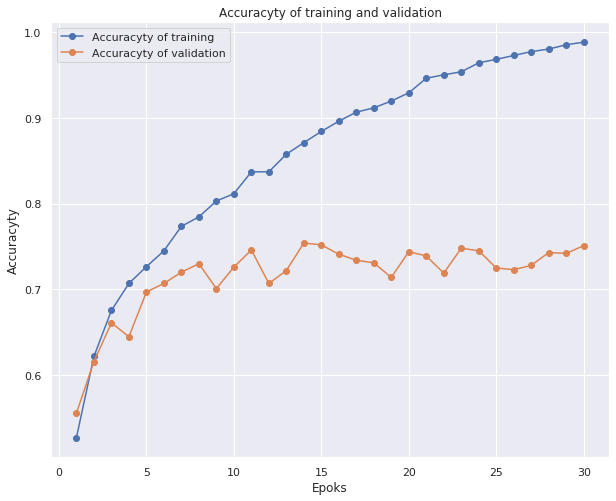

In [33]:
make_acc_plot(history)

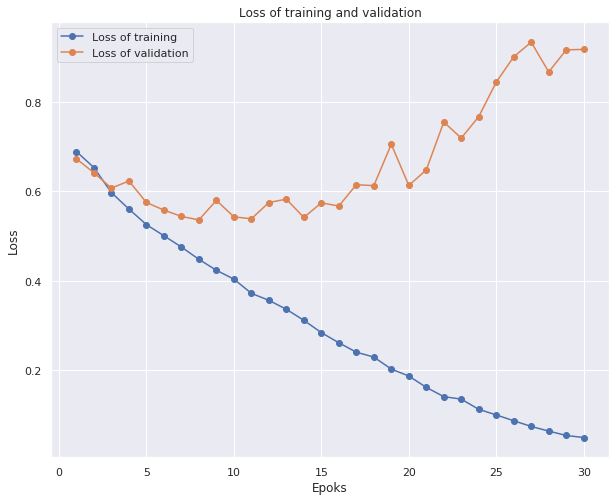

In [34]:
make_loss_plt(history)

In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

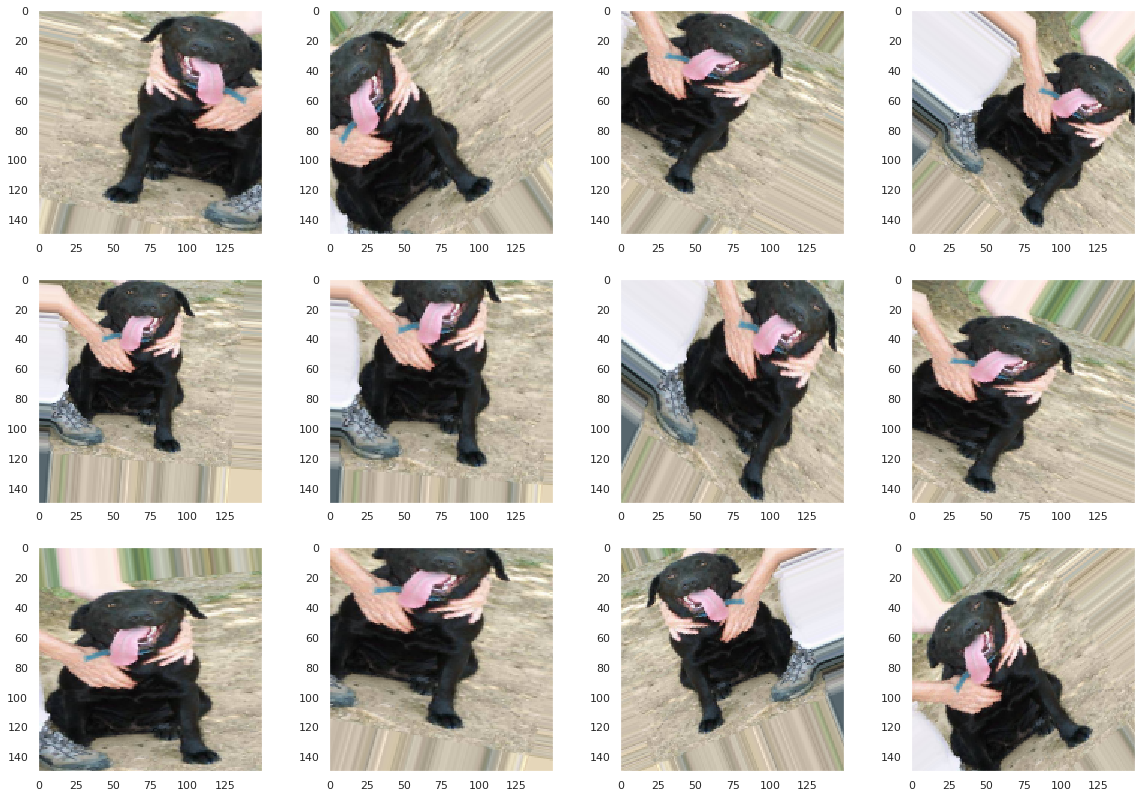

In [22]:
from keras.preprocessing import image

index = 286 #@param {type:'slider', min:0, max:999}
display_aug_images(train_dogs_dir, index)



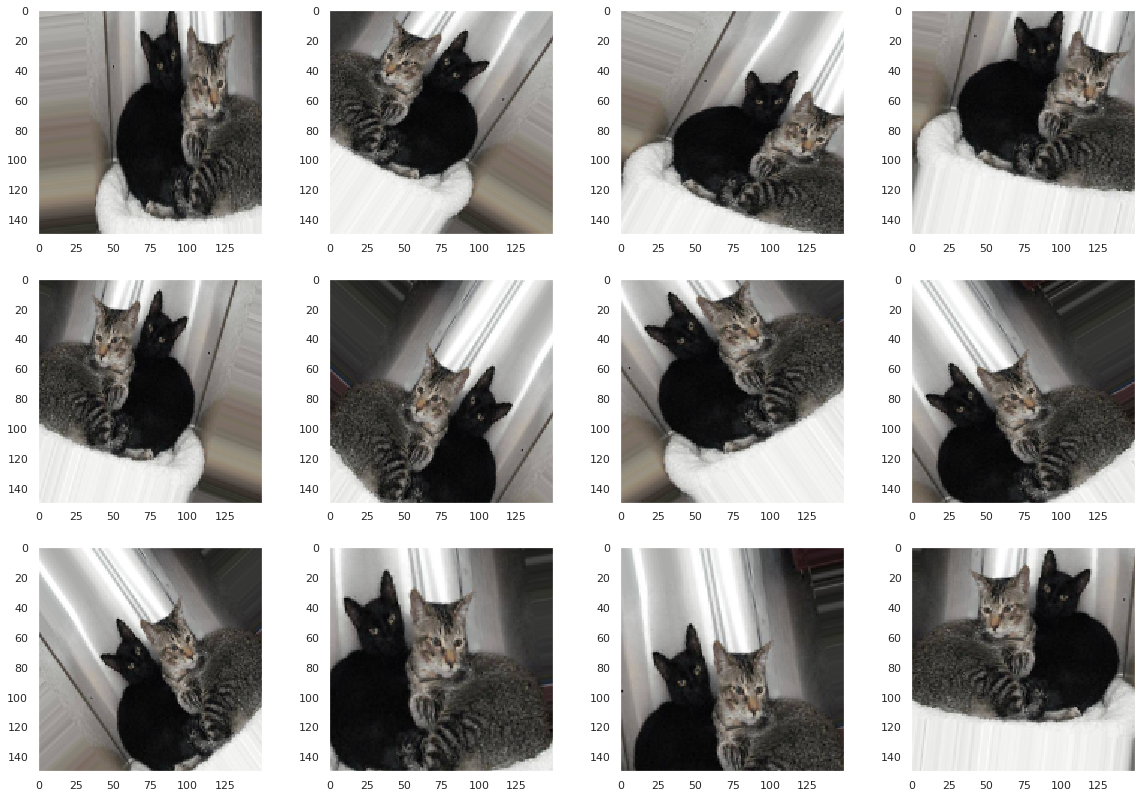

In [0]:
from keras.preprocessing import image

index = 441 #@param {type:'slider', min:0, max:999}
display_aug_images(train_cats_dir, index)



In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy', metrics=['accuracy'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=valid_generator,
                              validation_steps=50)


Epoch 1/100
100/100 [==============================] - 10s 98ms/step - loss: 0.0407 - acc: 0.9890 - val_loss: 1.0486 - val_acc: 0.7390
Epoch 2/100
100/100 [==============================] - 9s 91ms/step - loss: 0.0328 - acc: 0.9905 - val_loss: 1.0267 - val_acc: 0.7310
Epoch 3/100
100/100 [==============================] - 9s 91ms/step - loss: 0.0262 - acc: 0.9960 - val_loss: 1.1005 - val_acc: 0.7420
Epoch 4/100
100/100 [==============================] - 9s 91ms/step - loss: 0.0276 - acc: 0.9945 - val_loss: 1.1432 - val_acc: 0.7530
Epoch 5/100
100/100 [==============================] - 9s 90ms/step - loss: 0.0232 - acc: 0.9935 - val_loss: 1.1943 - val_acc: 0.7360
Epoch 6/100
100/100 [==============================] - 9s 90ms/step - loss: 0.0184 - acc: 0.9960 - val_loss: 1.1669 - val_acc: 0.7510
Epoch 7/100
100/100 [==============================] - 9s 90ms/step - loss: 0.0165 - acc: 0.9950 - val_loss: 1.2023 - val_acc: 0.7440
Epoch 8/100
100/100 [==============================] - 9s 90m

In [0]:
model.save('cats_and_dogs_.h5')

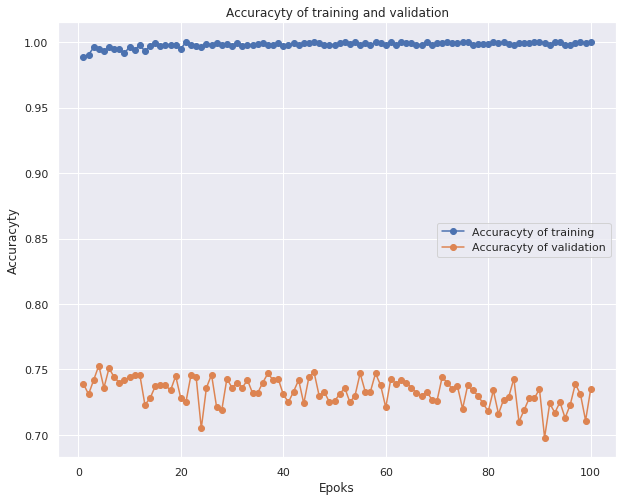

In [37]:
make_acc_plot(history)

In [39]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [41]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [42]:
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))


30
4


In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                               steps_per_epoch=100,
                               epochs=50,
                               validation_data=valid_generator,
                               validation_steps=50,
                               verbose=2)

Epoch 1/50
 - 23s - loss: 0.6070 - acc: 0.6830 - val_loss: 0.4659 - val_acc: 0.8110
Epoch 2/50
 - 20s - loss: 0.4903 - acc: 0.7795 - val_loss: 0.3793 - val_acc: 0.8520
Epoch 3/50
 - 20s - loss: 0.4336 - acc: 0.8125 - val_loss: 0.3324 - val_acc: 0.8720
Epoch 4/50
 - 20s - loss: 0.4083 - acc: 0.8160 - val_loss: 0.3066 - val_acc: 0.8760
Epoch 5/50
 - 20s - loss: 0.3820 - acc: 0.8345 - val_loss: 0.2940 - val_acc: 0.8860
Epoch 6/50
 - 20s - loss: 0.3756 - acc: 0.8325 - val_loss: 0.2800 - val_acc: 0.8860
Epoch 7/50
 - 20s - loss: 0.3658 - acc: 0.8365 - val_loss: 0.2761 - val_acc: 0.8750
Epoch 8/50
 - 20s - loss: 0.3417 - acc: 0.8595 - val_loss: 0.2689 - val_acc: 0.8920
Epoch 9/50
 - 20s - loss: 0.3466 - acc: 0.8470 - val_loss: 0.2645 - val_acc: 0.8840
Epoch 10/50
 - 20s - loss: 0.3301 - acc: 0.8525 - val_loss: 0.2680 - val_acc: 0.8880
Epoch 11/50
 - 20s - loss: 0.3438 - acc: 0.8470 - val_loss: 0.2560 - val_acc: 0.8910
Epoch 12/50
 - 20s - loss: 0.3250 - acc: 0.8520 - val_loss: 0.2518 - val_a

Vizualization of learning process

In [55]:
9indexfrom keras.models import load_model

model = load_model('cats_and_dogs_small_1.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [65]:

from keras.preprocessing import image
import numpy as np

index = 1745 #@param {type:'slider', min:1500, max:1999}
img_path = '/content/cats_and_dogs/test/cats/cat.' + str(index) + '.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255.

print(img_tensor.shape)

(1, 150, 150, 3)


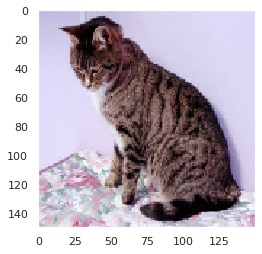

In [68]:
plt.imshow(img_tensor[0])
plt.grid(False)

In [70]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


Bread and buttter why it work


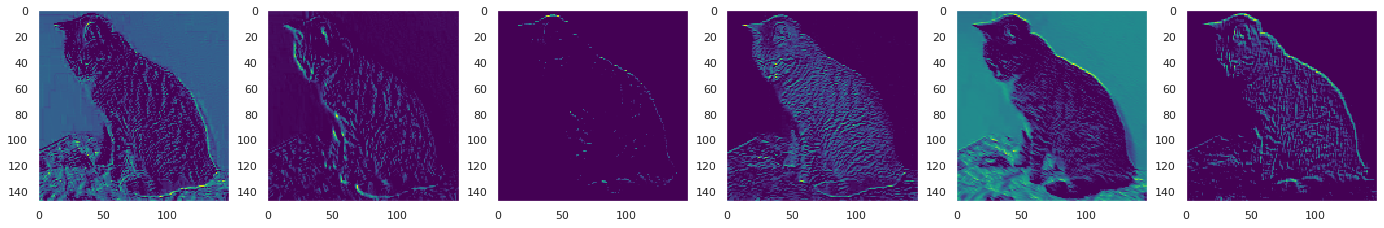

In [73]:
plt.figure(figsize=(24,24))

for i in range(1, 7):
  plt.subplot(1,6,i)
  plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
  [plt.grid(False)]

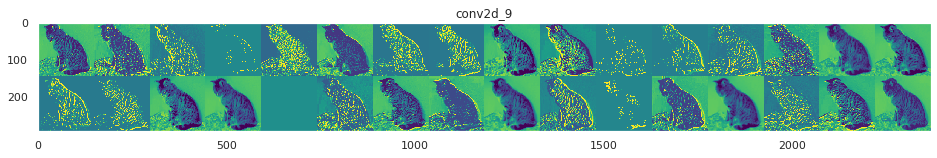

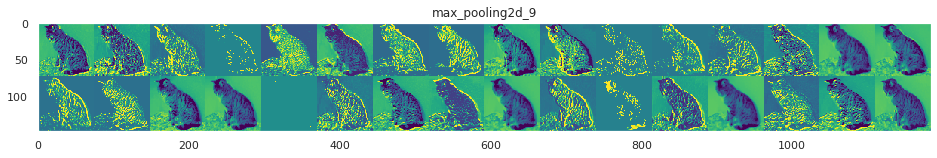

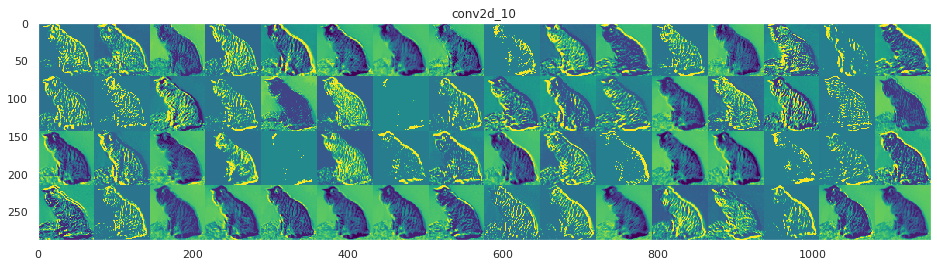

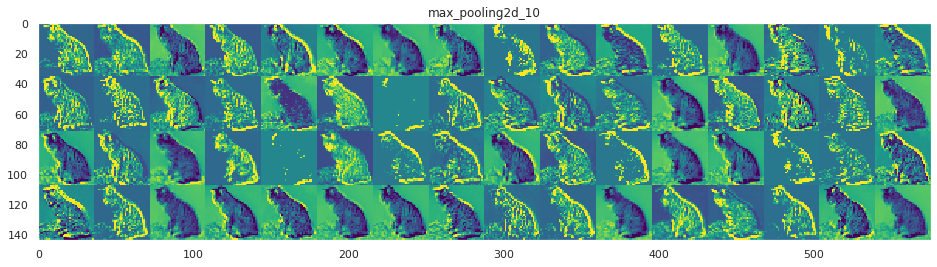

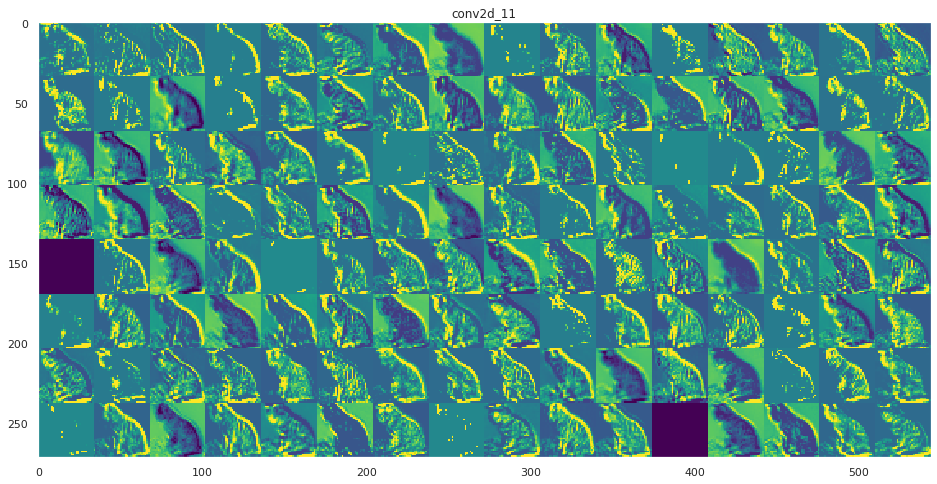

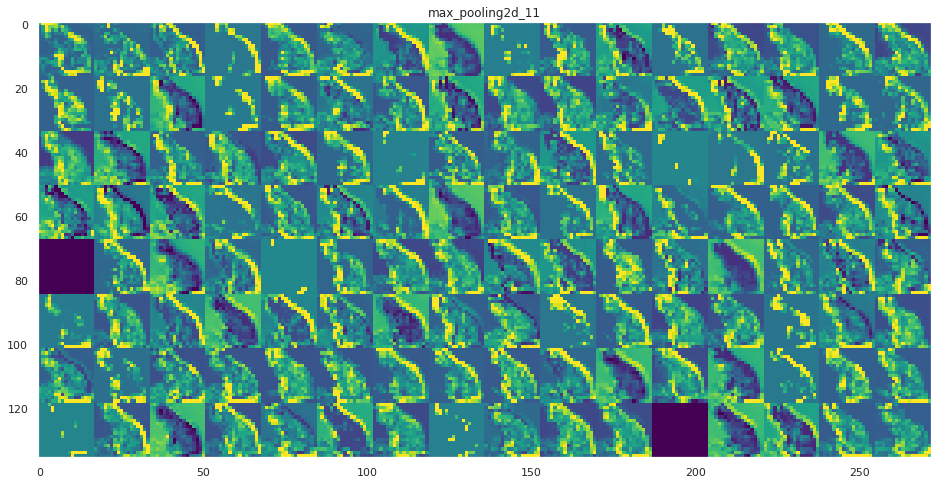

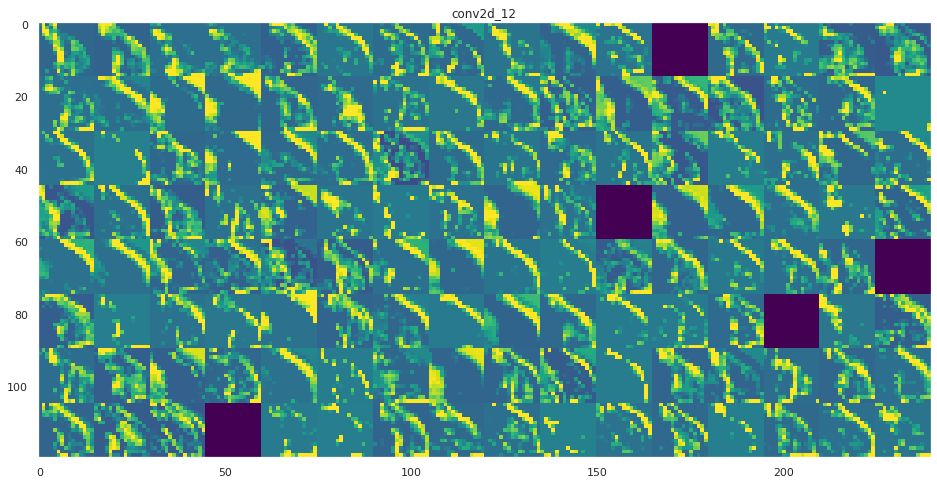

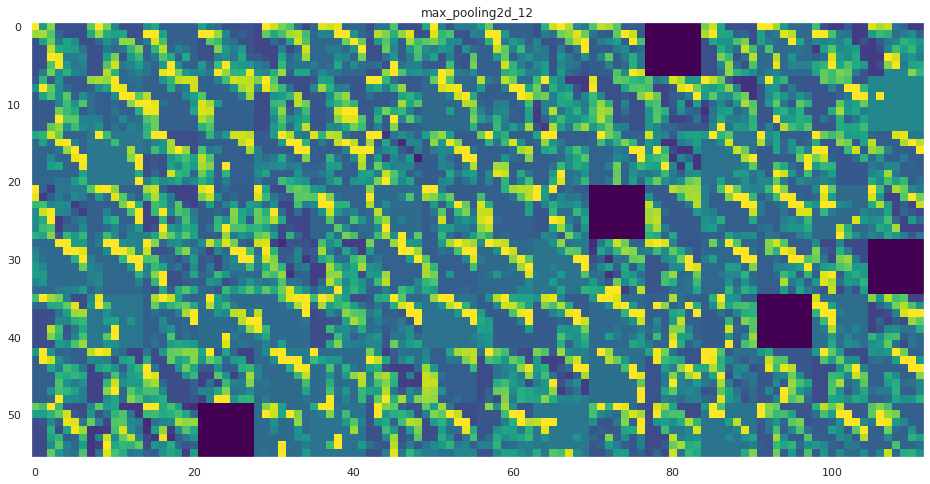

In [76]:
layer_names = [layer.name for layer in model.layers[:8]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row

  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size: (col + 1) * size, row * size: (row+ + 1) * size] = channel_image
      
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')


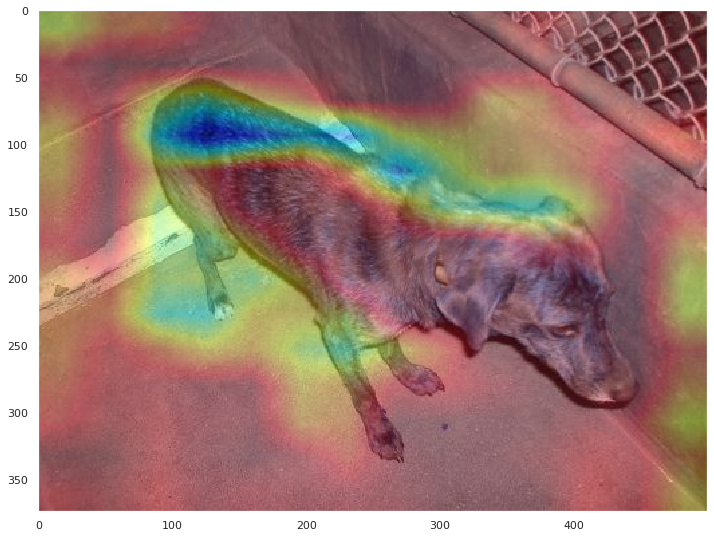

In [86]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

pets = 'dogs' #@param ['cats', 'dogs']
index = 1893 #@param {'type': 'slider', min :1500, max: 1999}

model = VGG16(weights="imagenet")
img_path = '/content/cats_and_dogs/test/' + pets + '/' + pets[:3] + '.' + str(index) + '.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.imshow(superimposed_img, cmap='viridis')
plt.grid(False)
plt.show()

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
             include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input], [loss,grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150 , 3))])

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.

for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    input_img_data += grads_value * step
    
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [89]:
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

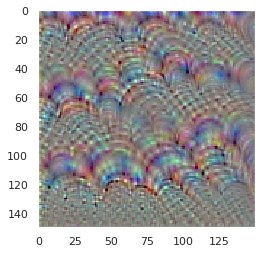

In [92]:
layer = 'block4_conv2' #@param ['block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
plt.imshow(generate_pattern(layer, 1))
plt.grid(False)